Here, the goal is to investigate [Kaggle's House Price competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). I try different regression models inclduing boosting methods (see [here](https://en.wikipedia.org/wiki/Boosting_(machine_learning)) based on sklearn package. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

directory = '../../Datasets/House_Price/'
train_input = pd.read_csv(directory+'train.csv')
test_input = pd.read_csv(directory+'test.csv')
test_ID = test_input['Id']

### Correlation between columns

First, let's generate a heatmap to evaluate the correlation between Sale Price and other paramters. Clearly, some paramters such as LotArea and LotFrontage are very important and they are highly correclated with the final Sale Price.

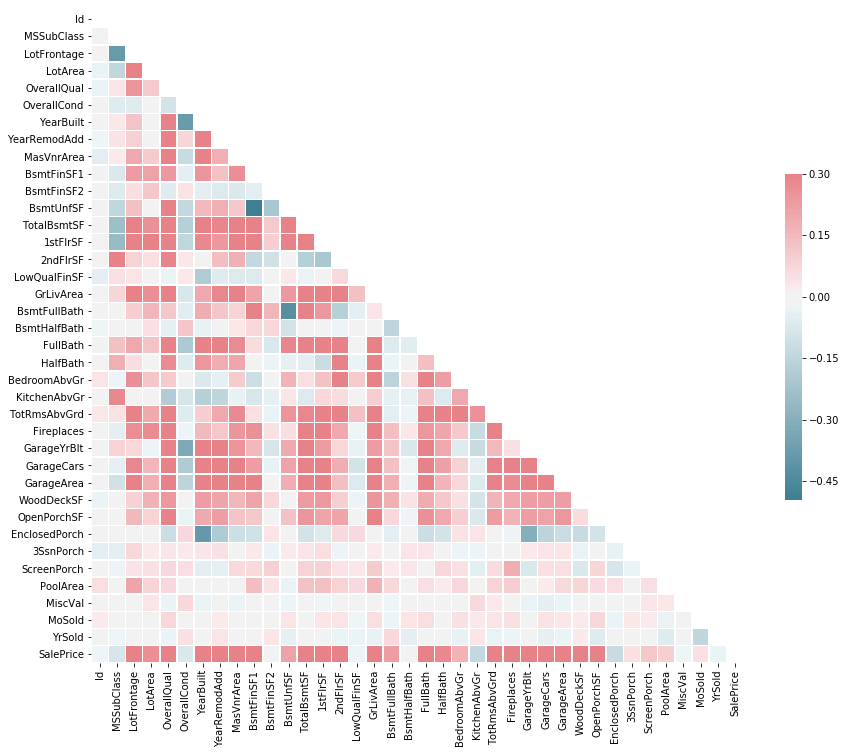

In [2]:
# generate a headmap for features in a data frame
import seaborn as sns
import numpy as np
corr = train_input.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_input.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Removing outliers

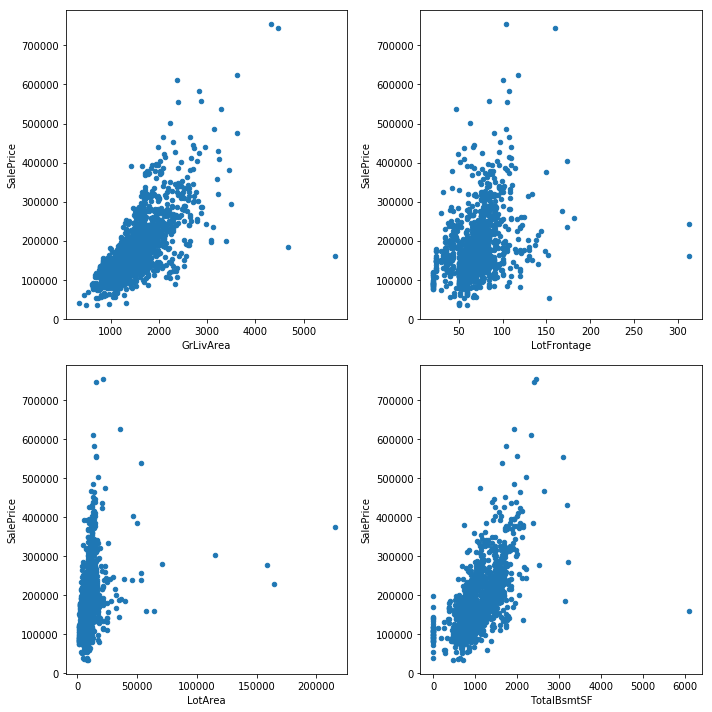

In [3]:
hsize = 2
wsize = 2
f, ax = plt.subplots(hsize,wsize,figsize=[10, 10])
columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF']
for i in range(0,hsize):
    for j in range(0,wsize):
        train_input.plot.scatter(columns[i*wsize+j],'SalePrice', ax=ax[i][j], title=None)
plt.tight_layout() 

In [4]:
train_input.shape

(1460, 81)

In [5]:
train_input = train_input.drop(train_input[(train_input['GrLivArea']>4000) & (train_input['SalePrice']<300000)].index)
train_input = train_input.drop(train_input[(train_input['LotFrontage']>300) & (train_input['SalePrice']<300000)].index)
train_input = train_input.drop(train_input[(train_input['LotArea']>100000) & (train_input['SalePrice']<400000)].index)
train_input.shape

(1453, 81)

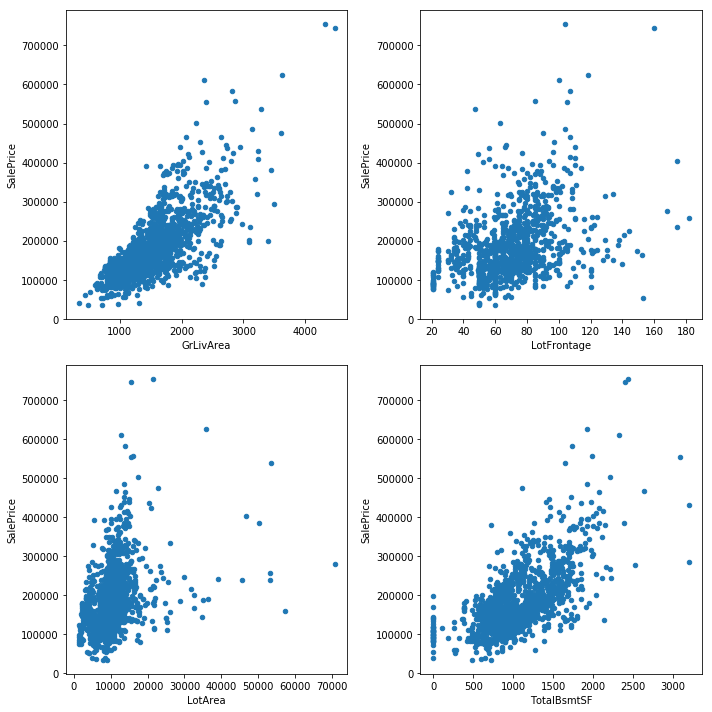

In [6]:
hsize = 2
wsize = 2
f, ax = plt.subplots(hsize,wsize,figsize=[10, 10])
columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF']
for i in range(0,hsize):
    for j in range(0,wsize):
        train_input.plot.scatter(columns[i*wsize+j],'SalePrice', ax=ax[i][j], title=None)
plt.tight_layout() 

### Rescaling target values

In [7]:
import numpy as np
train_input["SalePrice"] = np.log1p(train_input["SalePrice"])

### Filling missing data

In [8]:
ntrain = train_input.shape[0]
ntest = test_input.shape[0]
test_input['SalePrice'] = 0
all_data = pd.concat((train_input, test_input)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2912, 81)


In [9]:
#all_data['LotFrontage'].fillna(all_data.LotFrontage.mean(), inplace=True)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data['Alley'].fillna('NoAccess', inplace=True)

all_data['BsmtQual'].fillna('NoBsmt', inplace=True)
all_data['BsmtCond'].fillna('NoBsmt', inplace=True)
all_data['BsmtExposure'].fillna('NoBsmt', inplace=True)
all_data['BsmtFinType1'].fillna('NoBsmt', inplace=True)
all_data['BsmtFinType2'].fillna('NoBsmt', inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['BsmtUnfSF'].fillna(0, inplace=True)
all_data['TotalBsmtSF'].fillna(0, inplace=True)

all_data['FireplaceQu'].fillna('NoFireplace', inplace=True)

all_data['GarageType'].fillna('NoGarage', inplace=True)
all_data['GarageFinish'].fillna('NoGarage', inplace=True)
all_data['GarageQual'].fillna('NoGarage', inplace=True)
all_data['GarageCond'].fillna('NoGarage', inplace=True)
all_data['GarageYrBlt'].fillna(0, inplace=True)
all_data['GarageCars'].fillna(0, inplace=True)
all_data['GarageArea'].fillna(0, inplace=True)

all_data['MasVnrType'].fillna((all_data['MasVnrType']).mode()[0], inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True)

all_data['PoolQC'].fillna('NoPool', inplace=True)

all_data['Electrical'].fillna((all_data['Electrical']).mode()[0], inplace=True)

all_data['Fence'].fillna('NoFence', inplace=True)

all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype('int64')

all_data['KitchenQual'].fillna((all_data['KitchenQual']).mode()[0], inplace=True)

all_data['MiscFeature'].fillna((all_data['MiscFeature']).mode()[0], inplace=True)

all_data['Utilities'].fillna((all_data['Utilities']).mode()[0], inplace=True)

all_data['Functional'].fillna((all_data['Functional']).mode()[0], inplace=True)

all_data['MSZoning'].fillna((all_data['MSZoning']).mode()[0], inplace=True)

all_data['Exterior1st'].fillna((all_data['Exterior1st']).mode()[0], inplace=True)
all_data['Exterior2nd'].fillna((all_data['Exterior2nd']).mode()[0], inplace=True)
all_data['SaleType'].fillna((all_data['SaleType']).mode()[0], inplace=True)

In [10]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Changing some numeric features to categorical features

In [11]:
all_data.drop(['Id'], axis=1, inplace=True)
all_data.drop(['Utilities'], axis=1, inplace=True)

for col in all_data.columns:
    if str(all_data[col].dtype)=='object':
        all_data[col]= all_data[col].astype('category')

### Adding a new feature

In [12]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print('Shape dataset: {}'.format(all_data.shape))

Shape dataset: (2912, 80)


### Finding numerical and categorical features

In [13]:
categorical_features = all_data.select_dtypes(include = ["category"]).columns
numerical_features = all_data.select_dtypes(include = ["int64", "float64"]).columns
numerical_features = list(set(numerical_features) - set(['SalePrice']))
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 33
Categorical features : 46


In [14]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Adding polynomial features

In [15]:
from sklearn.preprocessing import LabelEncoder
for c in categorical_features:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    all_data[c] = all_data[c].astype('category')

In [16]:
all_data.shape

(2912, 80)

In [17]:
poly_features = ['BedroomAbvGr', 'KitchenAbvGr','LotFrontage', 'GarageCars', 
                 'FullBath', 'Fireplaces']

new_numerical_features = set(numerical_features)
for c1 in range(0,len(poly_features)):
    for c2 in range(0,c1):
        for c3 in range(0,c2):                
            c11, c12, c13 = poly_features[c1], poly_features[c2], poly_features[c3]
            all_data[str(c11)+'_'+str(c12)+'_'+str(c13)] = all_data[c11] * all_data[c12] * all_data[c13]
            new_numerical_features.add(str(c11)+'_'+str(c12)+'_'+str(c13))
new_numerical_features = list(new_numerical_features)
all_data.shape

(2912, 100)

In [18]:
numerical_features = new_numerical_features

### Handling skewness in the features

In [19]:
from scipy.stats import skew

# Check the skew of all numerical features
skewed_feats = all_data[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.944005
PoolArea,17.673354
LowQualFinSF,12.073977
3SsnPorch,11.362112
KitchenAbvGr,4.296287
BsmtFinSF2,4.158442
EnclosedPorch,3.998474
ScreenPorch,3.941117
BsmtHalfBath,3.940486
FullBath_KitchenAbvGr_BedroomAbvGr,3.816099


In [20]:
skewness = skewness[abs(skewness) > 0.25]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam) 

There are 53 skewed numerical features to Box Cox transform


### Creating boolean features for categorical features

In [21]:
print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2912, 100)
(2912, 358)


### Recovering test & train data

In [22]:
train_input = all_data[:ntrain]
test_input = all_data[ntrain:]

train_input.head(1)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,5.831328,19.212182,2.440268,14.187527,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,...,0,0,0,1,0,0,0,0,1,0


### Evaluting feature correlation 

In [23]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train_input.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[1:30])

Find most important features relative to target
TotalSF                                 0.821972
OverallQual                             0.810329
GrLivArea                               0.737239
FullBath_GarageCars_BedroomAbvGr        0.682735
FullBath_GarageCars_LotFrontage         0.675831
Fireplaces_FullBath_GarageCars          0.662791
FullBath_GarageCars_KitchenAbvGr        0.662072
GarageCars                              0.650821
1stFlrSF                                0.615296
Fireplaces_GarageCars_KitchenAbvGr      0.615245
Fireplaces_GarageCars_BedroomAbvGr      0.602258
Fireplaces_GarageCars_LotFrontage       0.597084
YearBuilt                               0.588222
FullBath                                0.583229
Fireplaces_FullBath_KitchenAbvGr        0.582335
Fireplaces_FullBath_BedroomAbvGr        0.576186
Fireplaces_FullBath_LotFrontage         0.575409
GarageCars_LotFrontage_BedroomAbvGr     0.568901
YearRemodAdd                            0.568170
GarageCars_LotFrontag

In [24]:
train_target = train_input['SalePrice'].astype(float)

train_input.is_copy = False
test_input.is_copy = False
train_input.drop(labels=['SalePrice'], axis=1, inplace=True)
test_input.drop(labels=['SalePrice'], axis=1, inplace=True)

In [25]:
X_train, y_train = train_input, train_target

### Trying base and ensemble regression models

In [26]:
from sklearn.linear_model import ElasticNet, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [27]:
#Validation function
n_folds = 5
cv = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)

In [28]:
def root_mse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [29]:
lasso = make_pipeline(MinMaxScaler(), Lasso(random_state=1, max_iter=2000))

param_grid = [{'lasso__alpha': np.linspace(0.0001, 0.001, 15)}]
gs_lasso = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', verbose=1, cv = cv, n_jobs=-1)
gs_lasso.fit(X_train, y_train)
print('Lasso best score: {} \nLasso best params: {}'.format(np.sqrt(-gs_lasso.best_score_), gs_lasso.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   10.2s finished


Lasso best score: 0.11146179161665995 
Lasso best params: {'lasso__alpha': 0.00035714285714285714}


In [30]:
ENet = make_pipeline(MinMaxScaler(), ElasticNet(random_state=1))

param_grid = [{'elasticnet__alpha': np.linspace(0.0004, 0.001, 15),
              'elasticnet__l1_ratio': (0.98, 0.95, 0.9)}]
gs_enet = GridSearchCV(ENet, param_grid, scoring='neg_mean_squared_error', verbose=1, cv = cv, n_jobs=-1)
gs_enet.fit(X_train, y_train)
print('ElasticNet best score: {} \nElasticNetbest params: {}'.format(np.sqrt(-gs_enet.best_score_), gs_enet.best_params_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   15.7s finished


ElasticNet best score: 0.1114782238196748 
ElasticNetbest params: {'elasticnet__alpha': 0.00040000000000000002, 'elasticnet__l1_ratio': 0.98}


In [31]:
KRR = make_pipeline(MinMaxScaler(), KernelRidge(kernel='polynomial', coef0=2.5))

param_grid = [{'kernelridge__alpha': np.linspace(0.01, 0.9, 20),
              'kernelridge__degree': (4, 5, 6)}]
gs_krr = GridSearchCV(KRR, param_grid, scoring='neg_mean_squared_error', verbose=1, cv = cv, n_jobs=-1)
gs_krr.fit(X_train, y_train)
print('KernelRidge best score: {} \nKernelRidge best params: {}'.format(np.sqrt(-gs_krr.best_score_), gs_krr.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   58.4s finished


KernelRidge best score: 0.11599661241822305 
KernelRidge best params: {'kernelridge__alpha': 0.38473684210526315, 'kernelridge__degree': 4}


In [32]:
GBoost = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(max_features='sqrt',random_state=1))

param_grid = [{'gradientboostingregressor__n_estimators': (2000, 3000, 4000, 5000),
              'gradientboostingregressor__learning_rate': (0.0025, 0.005, 0.008),
              'gradientboostingregressor__max_depth': (3, 4, 5)}]
gs_gboost = GridSearchCV(GBoost, param_grid, scoring='neg_mean_squared_error', verbose=1, cv = cv, n_jobs=-1)
gs_gboost.fit(X_train, y_train)
print('GradientBoostingRegressor best score: {} \nGradientBoostingRegressor best params: {}'.format(np.sqrt(-gs_gboost.best_score_), gs_gboost.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.8min finished


GradientBoostingRegressor best score: 0.11423047685506897 
GradientBoostingRegressor best params: {'gradientboostingregressor__learning_rate': 0.008, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 5000}


In [35]:
model_lgb = make_pipeline(MinMaxScaler(), 
                          lgb.LGBMRegressor(objective='regression', random_state=1))

param_grid = [{'lgbmregressor__n_estimators': (3000, 4000, 5000, 6000),
              'lgbmregressor__learning_rate': (0.005, 0.008),
              'lgbmregressor__num_leaves': (3, 4, 5)}]
gs_lgb = GridSearchCV(model_lgb, param_grid, scoring='neg_mean_squared_error', verbose=1, cv = cv, n_jobs=-1)
gs_lgb.fit(X_train, y_train)
print('LGBMRegressor best score: {} \nLGBMRegressor best params: {}'.format(np.sqrt(-gs_lgb.best_score_),gs_lgb.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


LGBMRegressor best score: 0.12113175909927536 
LGBMRegressor best params: {'lgbmregressor__learning_rate': 0.008, 'lgbmregressor__n_estimators': 5000, 'lgbmregressor__num_leaves': 3}


In [36]:
model_rforest = make_pipeline(MinMaxScaler(), RandomForestRegressor(random_state=1))

param_grid = [{'randomforestregressor__n_estimators': (2000, 3000, 4000),
              'randomforestregressor__max_depth': (3, 4, 5)}]
gs_rforest = GridSearchCV(model_rforest, param_grid, verbose=1, scoring='neg_mean_squared_error', cv = cv, n_jobs=-1)
gs_rforest.fit(X_train, y_train)
print('RandomForestRegressor best score: {} \nRandomForestRegressor best params: {}'.format(np.sqrt(-gs_rforest.best_score_), gs_rforest.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.2min finished


RandomForestRegressor best score: 0.15266978051619642 
RandomForestRegressor best params: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 3000}


In [37]:
model_adaboost = make_pipeline(MinMaxScaler(), AdaBoostRegressor(random_state=1))

param_grid = [{'adaboostregressor__n_estimators': (1000, 2000, 3000, 4000)}]
gs_aboost = GridSearchCV(model_adaboost, param_grid, verbose=1, scoring='neg_mean_squared_error', cv = cv, n_jobs=-1)
gs_aboost.fit(X_train, y_train)
print('AdaBoostRegressor best score: {} \nAdaBoostRegressor best params: {}'.format(np.sqrt(-gs_aboost.best_score_), gs_aboost.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.0min finished


AdaBoostRegressor best score: 0.16419197205003744 
AdaBoostRegressor best params: {'adaboostregressor__n_estimators': 3000}


### Creating models based on the best reported params

In [38]:
lasso = make_pipeline(MinMaxScaler(), Lasso(random_state=1, 
                                            max_iter=2000, 
                                           alpha=gs_lasso.best_params_['lasso__alpha']))

ENet = make_pipeline(MinMaxScaler(), ElasticNet(random_state=1, 
                                               alpha = gs_enet.best_params_['elasticnet__alpha'],
                                               l1_ratio = gs_enet.best_params_['elasticnet__l1_ratio']))

KRR = make_pipeline(MinMaxScaler(), KernelRidge(kernel='polynomial', 
                                                coef0=2.5,
                                               alpha=gs_krr.best_params_['kernelridge__alpha'],
                                               degree=gs_krr.best_params_['kernelridge__degree']))


model_lgb = make_pipeline(MinMaxScaler(), lgb.LGBMRegressor(objective='regression',
                                                           learning_rate =gs_lgb.best_params_['lgbmregressor__learning_rate'],
                                                           n_estimators =gs_lgb.best_params_['lgbmregressor__n_estimators'],
                                                           num_leaves =gs_lgb.best_params_['lgbmregressor__num_leaves'],
                                                            random_state=1))
GBoost = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(max_features='sqrt',
                                                                 learning_rate=gs_gboost.best_params_['gradientboostingregressor__learning_rate'], 
                                                                 max_depth=gs_gboost.best_params_['gradientboostingregressor__max_depth'],
                                                                 n_estimators=gs_gboost.best_params_['gradientboostingregressor__n_estimators'],
                                                                 random_state=1))

model_adaboost = make_pipeline(MinMaxScaler(), AdaBoostRegressor(random_state=1, 
                                                                n_estimators=gs_aboost.best_params_['adaboostregressor__n_estimators']))

model_rforest = make_pipeline(MinMaxScaler(), 
                              RandomForestRegressor(random_state=1,
                             n_estimators=gs_rforest.best_params_['randomforestregressor__n_estimators'],
                             max_depth=gs_rforest.best_params_['randomforestregressor__max_depth']))

### Stacking different models

In [40]:
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[lasso, model_lgb, GBoost, ENet], 
                           meta_regressor=lasso)

print(root_mse(y_train, stregr.fit(X_train, y_train).predict(X_train)))

0.0538026372684


### Writing output

In [42]:
p_test = np.expm1(stregr.predict(test_input))
out_df = pd.DataFrame(
    {'Id': test_ID, 'SalePrice': p_test}).to_csv(
    'out.csv', header=True, index=False)

In [43]:
submission = pd.read_csv('submission.csv')
submission = (submission.values)[:,1]
predicted = p_test
print(root_mse(submission, predicted))

8701.55901987


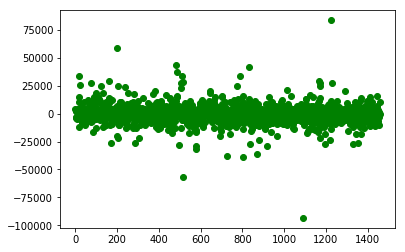

In [44]:
plt.scatter(np.arange(0,1459), predicted - submission, color='green')

In [45]:
L = np.where(np.abs(predicted-submission)>40000)
L

(array([ 200,  483,  514,  831, 1089, 1222], dtype=int64),)

In [46]:
print(predicted[L], submission[L])

[ 527405.95534525  404198.03440887  467293.6746002   485948.51767862
  649277.85178139  596277.29365374] [ 468470.03915321  360884.98722421  524232.07342516  444263.44057496
  742737.22290192  512633.15437806]


In [47]:
test_input = pd.read_csv(directory+'test.csv')
test_input['SalePrice'] = predicted

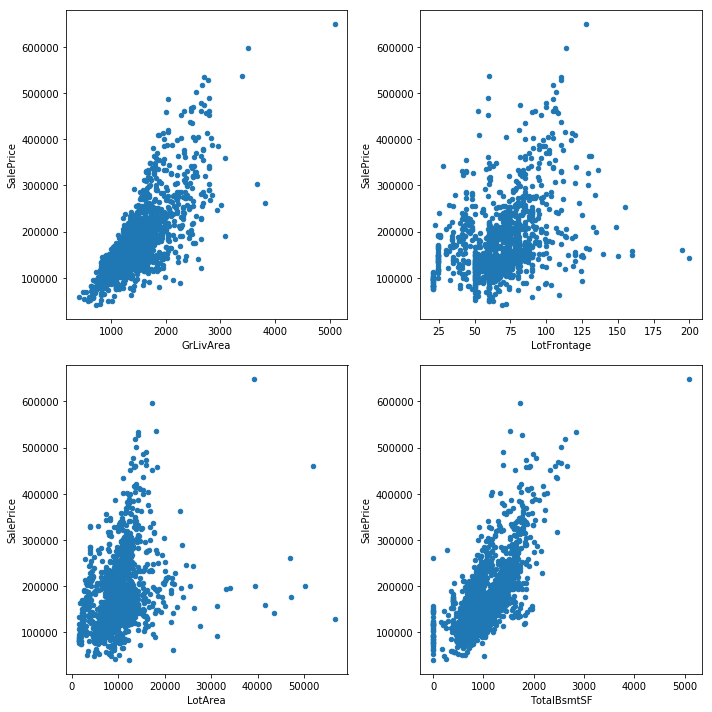

In [48]:
hsize = 2
wsize = 2
f, ax = plt.subplots(hsize,wsize,figsize=[10, 10])
columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF']
for i in range(0,hsize):
    for j in range(0,wsize):
        test_input.plot.scatter(columns[i*wsize+j],'SalePrice', ax=ax[i][j], title=None)
plt.tight_layout() 